In [2]:
# Loading all the necessary python libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import datetime as dt

C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [73]:
# import joblib
from joblib import dump


In [79]:
from joblib import load

In [14]:
# reading data
itemCatSalesDF = pd.read_excel("./datasets/restaurantItemSales_byProd_v1.xlsx")

In [15]:
# considering only the significant variables
requiredColumn = ['Date', 'dayOfMonth__0', 'dayOfMonth__1', 'dayOfMonth__2', 'dayOfMonth__3', 
                  'dayOfMonth__4', 'dayOfMonth__5', 'dayOfMonth__6', 'dayOfMonth__7', 'dayOfMonth__8', 
                  'dayOfMonth__9', 'dayOfMonth__10', 'dayOfMonth__11', 'dayOfMonth__12', 
                  'dayOfMonth__13', 'dayOfMonth__14', 'dayOfMonth__15', 'dayOfMonth__16', 
                  'dayOfMonth__17', 'dayOfMonth__18', 'dayOfMonth__19', 'dayOfMonth__20', 
                  'dayOfMonth__21', 'dayOfMonth__22', 'dayOfMonth__23','dayOfMonth__24', 
                  'dayOfMonth__25', 'dayOfMonth__26', 'dayOfMonth__27','dayOfMonth__28', 
                  'dayOfMonth__29', 'dayOfMonth__30', 'dayOfWeek__0','dayOfWeek__1', 'dayOfWeek__2', 
                  'dayOfWeek__3', 'dayOfWeek__4', 'dayOfWeek__5', 'dayOfWeek__6', 'monthOfYear__0', 
                  'monthOfYear__1','monthOfYear__2', 'monthOfYear__3', 'monthOfYear__4', 
                  'monthOfYear__5','monthOfYear__6', 'monthOfYear__7', 'monthOfYear__8', 
                  'monthOfYear__9','monthOfYear__10', 'monthOfYear__11', 'tempMax', 'weatherScore__0',
                  'weatherScore__1', 'weatherScore__3', 'weatherScore__4','weatherScore__5', 
                  'weatherScore__6', 'weatherScore__7','weatherScore__8', 'weatherScore__9', 
                  'weatherScore__10','weatherScore__11', 'weatherScore__12', 'weatherScore__13',
                  'weatherScore__14', 'weatherScore__15', 'weatherScore__16','weatherScore__17', 
                  'weatherScore__18', 'weatherScore__19','currentHoliday', 'barjariOota', 'chaat', 
                  'hotBeverages', 'iceCream', 'idly', 'juice', 'masalaDosa', 'southMeals']

itemSalesDF = itemCatSalesDF[requiredColumn]

In [102]:
# Removing the NaN values
itemSalesDF = itemSalesDF.dropna()
itemSalesDF.shape

(852, 80)

In [103]:
# Dataset allocation for training and testing
# allocating last 15-days data for testing
itemCatSalesTrain = itemSalesDF[:-15]
itemCatSalesTest = itemSalesDF[-15:]

# train test manual split for model
X_train = itemCatSalesTrain.iloc[:, 1:-8]
y_train = itemCatSalesTrain.iloc[:, -8:]

X_test = itemCatSalesTest.iloc[:, 1:-8]
y_test = itemCatSalesTest.iloc[:, -8:]

In [104]:
# naming features and labels from the dataframe
dfFeatures = itemCatSalesDF.iloc[:, 1:-8]
dfLables = itemCatSalesDF.iloc[:, -8:]

## Linear Regression for Multioutput Regression

[[ 318.8671875   177.74414062 1911.90625     368.953125    163.74902344
    28.44921875  171.59375      76.96484375]
 [ 338.34375     181.33789062 1856.84375     353.046875    156.640625
    29.46582031  170.5625       75.45507812]
 [ 381.73046875  203.53125    1626.8125      378.75        164.82714844
    23.77636719  161.5234375    92.75195312]
 [ 374.2734375   212.76757812 1731.0625      363.25        175.04101562
    24.21044922  198.96875      76.02099609]
 [ 527.23828125  294.40625    1953.71875     648.09375     192.26464844
    46.84765625  257.6484375    94.13720703]
 [ 640.69140625  326.41210938 1852.53125     875.40625     256.21484375
    43.04052734  314.140625     87.04248047]
 [ 364.73828125  206.41601562 1989.03125     372.015625    182.15625
    32.95458984  191.2734375    90.93945312]
 [ 368.22265625  172.3515625  1757.625       413.59375     170.28222656
    29.82617188  167.3515625    81.87011719]
 [ 483.22265625  232.5625     1655.65625     487.546875    175.887695

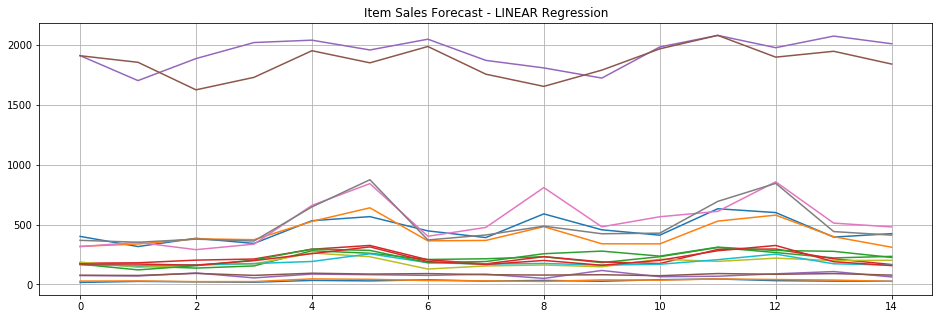

In [105]:

# linear regression for multioutput regression
# The linear regression model is fit and the results are predicted for 10 days. 

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
# create datasets
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1)
# define model
model = LinearRegression()
# fit model
model.fit(X_train.values, y_train.values)
# make a prediction
#data_in = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
y_pred = model.predict(X_test)
# summarize prediction
print(y_pred)

yColNames = y_test.columns

compareDFColNames = list()
compareArr = np.empty((15,0))

for i in range(y_pred.shape[1]):
    compareDFColNames.append(yColNames[i]+'_A')
    compareDFColNames.append(yColNames[i]+'_P')
    
    compareArr = np.concatenate((compareArr, y_test.values[:, i:i+1], 
                                 y_pred[:, i:i+1]), axis = 1)
    
# creating a ddataframe of test and predicted values.
 
comparisionDF = pd.DataFrame(compareArr, columns=compareDFColNames)


plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Item Sales Forecast - LINEAR Regression')
plt.plot(comparisionDF)


In [107]:
# dumping the model trained on item sales, for future use.
dump(model, filename='itemSalesModel_v0.joblib')

['itemSalesModel_v0.joblib']

In [108]:
# Inserting Date into the result dateframe
itemSalesResult = comparisionDF.copy()
itemSalesResult.insert(0, 'Date', '')
itemSalesResult

,Date,barjariOota_A,barjariOota_P,chaat_A,chaat_P,hotBeverages_A,hotBeverages_P,iceCream_A,iceCream_P,idly_A,idly_P,juice_A,juice_P,masalaDosa_A,masalaDosa_P,southMeals_A,southMeals_P
0,,402.0,318.867188,173.0,177.744141,1913.0,1911.90625,316.0,368.953125,187.0,163.749023,17.0,28.449219,170.0,171.593750,75.0,76.964844
1,,317.0,338.343750,154.0,181.337891,1704.0,1856.84375,352.0,353.046875,144.0,156.640625,26.0,29.465820,122.0,170.562500,71.0,75.455078
2,,386.0,381.730469,137.0,203.531250,1888.0,1626.81250,291.0,378.750000,164.0,164.827148,22.0,23.776367,157.0,161.523438,96.0,92.751953
3,,343.0,374.273438,155.0,212.767578,2022.0,1731.06250,337.0,363.250000,172.0,175.041016,19.0,24.210449,204.0,198.968750,55.0,76.020996
4,,533.0,527.238281,282.0,294.406250,2042.0,1953.71875,661.0,648.093750,263.0,192.264648,34.0,46.847656,296.0,257.648438,87.0,94.137207
5,,567.0,640.691406,261.0,326.412109,1960.0,1852.53125,843.0,875.406250,232.0,256.214844,30.0,43.040527,285.0,314.140625,82.0,87.042480
6,,448.0,364.738281,209.0,206.416016,2050.0,1989.03125,403.0,372.015625,129.0,182.156250,39.0,32.954590,182.0,191.273438,76.0,90.939453
7,,392.0,368.222656,215.0,172.351562,1873.0,1757.62500,477.0,413.593750,155.0,170.282227,28.0,29.826172,192.0,167.351562,86.0,81.870117
8,,590.0,483.222656,232.0,232.562500,1810.0,1655.65625,810.0,487.546875,163.0,175.887695,34.0,25.474121,257.0,200.898438,51.0,78.669434
9,,457.0,340.222656,183.0,188.714844,1725.0,1791.40625,482.0,423.953125,148.0,161.876953,27.0,38.302246,279.0,160.734375,117.0,81.522949


In [109]:

for i in range(len(itemSalesResult)):
    date = str(itemCatSalesTest['Date'].values[i])[:10]
    date = date[-2:]+'-'+date[-5:-3]+'-'+date[:4]
    itemSalesResult['Date'][i] = date
    
# Dumping the item Sales result for future use
dump(itemSalesResult, filename="itemSalesResult_v0.joblib")


C:\Users\Vignesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['itemSalesResult_v0.joblib']

In [92]:
resultTest = load('itemSalesResult_v0.joblib')

In [93]:
resultTest = resultTest[['barjariOota_A', 'barjariOota_P', 'chaat_A', 'chaat_P',
       'hotBeverages_A', 'hotBeverages_P', 'iceCream_A', 'iceCream_P',
       'idly_A', 'idly_P', 'juice_A', 'juice_P', 'masalaDosa_A',
       'masalaDosa_P', 'southMeals_A', 'southMeals_P']]

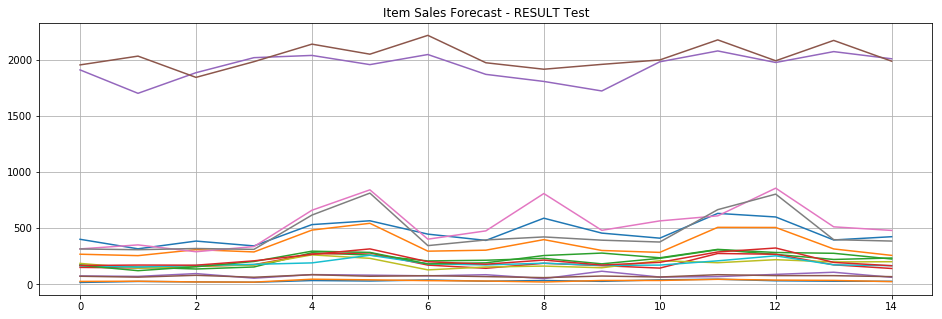

In [94]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Item Sales Forecast - RESULT Test')
plt.plot(resultTest)


## Evaluate Multioutput Regression With Cross-Validation

In [35]:
# 

from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
model = LinearRegression()

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train.values, y_train.values, scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')

# summarize performance
n_scores = absolute(n_scores)
print('Result: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Evaluating
from sklearn.metrics import mean_squared_error
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
# Checking for r2 score and rmse values

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

print("test_set_rmse: ", test_set_rmse)
print("test_set_r2: ", test_set_r2)



Result: 37563518.766 (202285419.857)
Mean Absolute Error: 78.46833333333333
Mean Squared Error: 15127.373666666665
test_set_rmse:  122.99338871120945
test_set_r2:  -0.9361460080338023
